In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
item_cat=pd.read_csv("item_categories.csv")
item=pd.read_csv("items.csv")
sales = pd.read_csv("sales_train.csv.gz")
# sub=pd.read_csv("sample_submission.csv.gz")
shops=pd.read_csv("shops.csv")
test=pd.read_csv("test.csv.gz")

In [59]:
sales.drop(columns="item_price",inplace=True)

In [60]:
sales.drop(columns="date",inplace=True)

In [61]:
test["date_block_num"] = 11

In [62]:
sales

,date_block_num,shop_id,item_id,item_cnt_day
0,0,59,22154,1.0
1,0,25,2552,1.0
2,0,25,2552,-1.0
3,0,25,2554,1.0
4,0,25,2555,1.0
5,0,25,2564,1.0
6,0,25,2565,1.0
7,0,25,2572,1.0
8,0,25,2572,1.0
9,0,25,2573,3.0


In [63]:
test

,ID,shop_id,item_id,date_block_num
0,0,5,5037,11
1,1,5,5320,11
2,2,5,5233,11
3,3,5,5232,11
4,4,5,5268,11
5,5,5,5039,11
6,6,5,5041,11
7,7,5,5046,11
8,8,5,5319,11
9,9,5,5003,11


In [64]:
sales["date_block_num"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33],
      dtype=int64)

In [65]:
sales.date_block_num.replace({13:1,14:2,15:3,16:4,17:5,18:6,19:7,20:8,21:9,22:10,23:11,24:12,25:1,26:2,27:3,28:4,29:5,30:6,31:7,32:8,33:9},inplace=True)

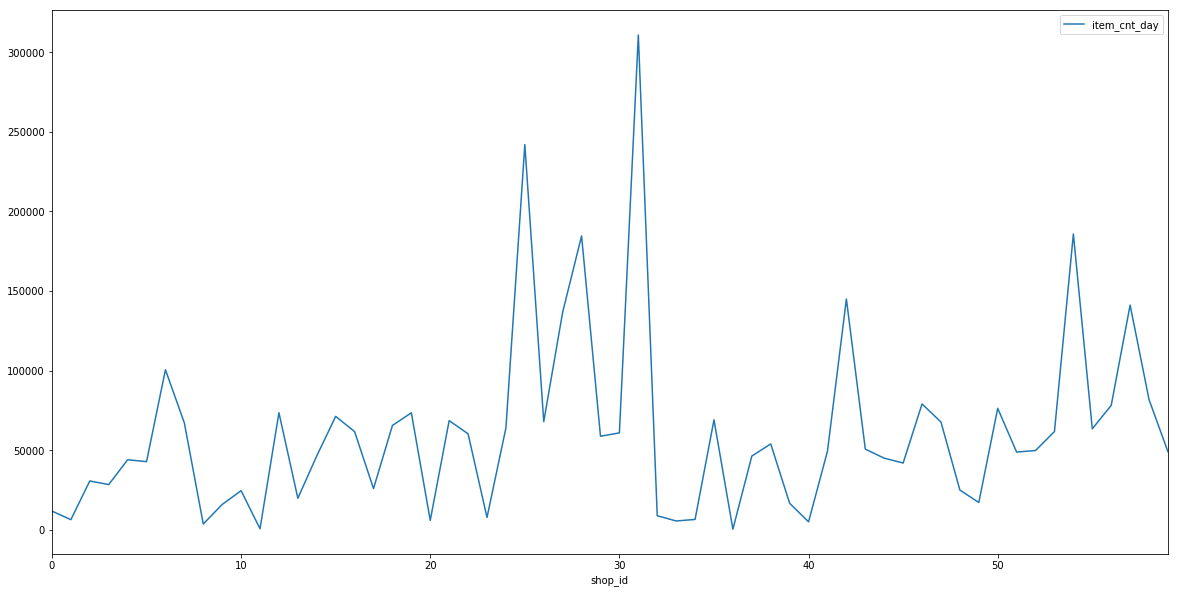

In [66]:
df = pd.DataFrame(sales.groupby(["shop_id"])["item_cnt_day"].sum())
df.plot(figsize=(20,10))

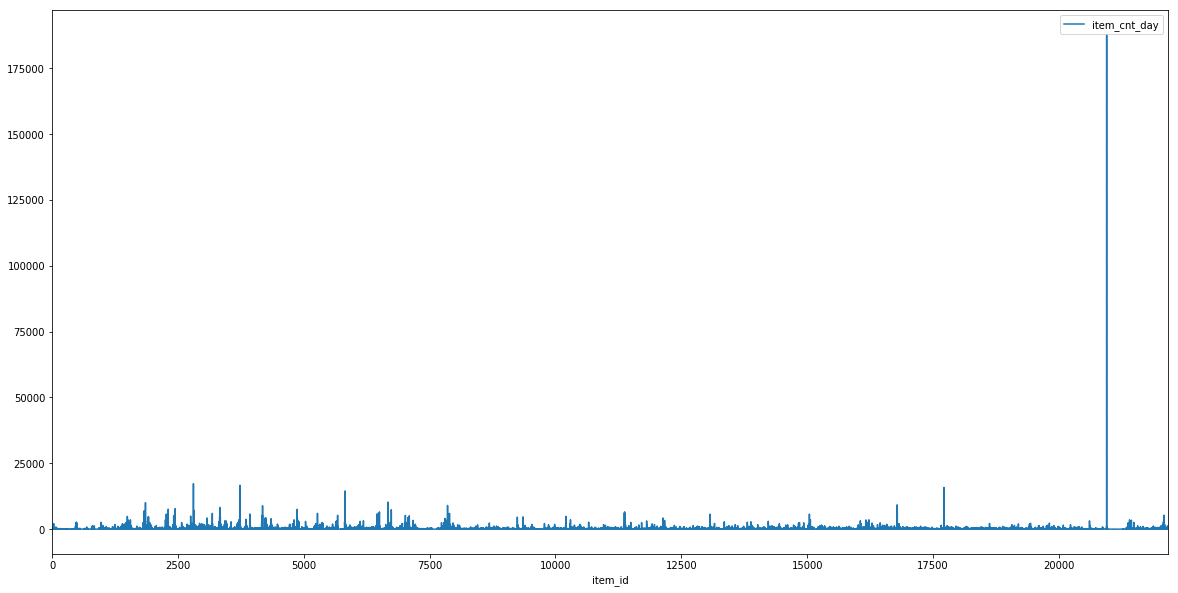

In [67]:
df = pd.DataFrame(sales.groupby(["item_id"])["item_cnt_day"].sum())
df.plot(figsize=(20,10))

In [90]:
sales = pd.get_dummies(sales)
sales["date_block_num"] = sales["da0te_block_num"].astype(np.int32)

In [92]:
sales["date_block_num"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [87]:
x_train = sales
y_train = x_train.pop("item_cnt_day")

KeyError: 'item_cnt_day'

In [69]:
x_train = x_train.as_matrix()
y_train = y_train.as_matrix()
test_id_idx = test.pop('ID')
x_test = test.as_matrix()

C:\Users\woon\Miniconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\woon\Miniconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\woon\Miniconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [70]:
x_train.shape,y_train.shape,x_test.shape

((2935849, 3), (2935849,), (214200, 3))

In [71]:
from sklearn import linear_model

In [72]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [73]:
# Make predictions using the testing set
submit = pd.DataFrame({'ID': test_id_idx, 'item_cnt_month': regr.predict(x_test)})
submit.head()

,ID,item_cnt_month
0,0,-3.810437
1,1,-4.091539
2,2,-4.005122
3,3,-4.004129
4,4,-4.039887


In [74]:
submit.to_csv("submission_all_day.csv", index=False)